In [2]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import mlgrad.models as models
import mlgrad.funcs as funcs
import mlgrad.funcs2 as funcs2
import mlgrad.avragg as avragg
import mlgrad.loss as loss
import mlgrad.regr as regr

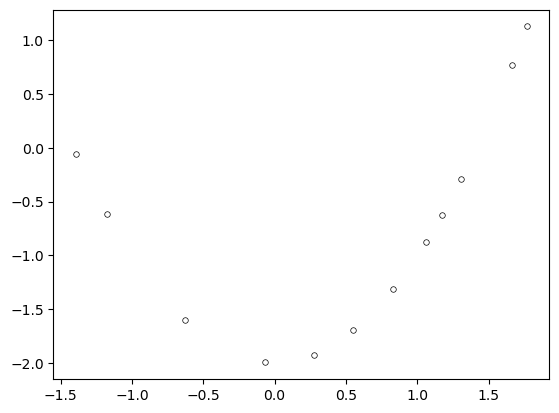

In [16]:
X0 = 4*np.random.random(12)-2
Y0 = (X0 - 2) * (X0 + 2) 
Y1 = Y0 + 2*np.random.random(12)-1
X1 = X0
X1s = X1.reshape(-1,1)

XR = np.linspace(-2,2,100)

def polynomial(params, X):
    m = len(params)
    Y = np.zeros_like(X, 'd')
    for j in range(m):
        Y += params[j] * (X ** j)
    return Y

def eval_u(X, m):
    Ys = []
    for j in range(m):
        Ys.append(X ** j)
    return np.c_[tuple(Ys)]

params = np.array([-2, 0, 1], 'd')
linmod = models.LinearModel(params)
Y0 = polynomial(params, X0)
plt.scatter(X0, Y0, c='w', edgecolors='k', s=16, linewidth=0.5)
plt.show()

In [17]:
U0 = eval_u(X0, 10)
U1 = eval_u(X1, 10)
print(U1)

[[ 1.000e+00  1.061e+00  1.127e+00  1.196e+00  1.269e+00  1.347e+00
   1.430e+00  1.518e+00  1.611e+00  1.710e+00]
 [ 1.000e+00  8.288e-01  6.870e-01  5.694e-01  4.719e-01  3.912e-01
   3.242e-01  2.687e-01  2.227e-01  1.846e-01]
 [ 1.000e+00  2.739e-01  7.500e-02  2.054e-02  5.625e-03  1.540e-03
   4.218e-04  1.155e-04  3.164e-05  8.663e-06]
 [ 1.000e+00 -1.393e+00  1.940e+00 -2.703e+00  3.765e+00 -5.245e+00
   7.307e+00 -1.018e+01  1.418e+01 -1.975e+01]
 [ 1.000e+00  1.769e+00  3.129e+00  5.534e+00  9.789e+00  1.732e+01
   3.063e+01  5.418e+01  9.583e+01  1.695e+02]
 [ 1.000e+00 -1.178e+00  1.387e+00 -1.634e+00  1.924e+00 -2.266e+00
   2.669e+00 -3.143e+00  3.702e+00 -4.360e+00]
 [ 1.000e+00 -6.438e-02  4.145e-03 -2.668e-04  1.718e-05 -1.106e-06
   7.120e-08 -4.584e-09  2.951e-10 -1.900e-11]
 [ 1.000e+00  1.307e+00  1.707e+00  2.231e+00  2.915e+00  3.809e+00
   4.977e+00  6.504e+00  8.498e+00  1.110e+01]
 [ 1.000e+00  1.665e+00  2.773e+00  4.617e+00  7.687e+00  1.280e+01
   2.131e+01

In [18]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

lasso = Lasso(alpha=0.1, fit_intercept=False)
lasso.fit(U1, Y1)

print(lasso.coef_)

# plt.bar(range(100), lasso.coef_)
# plt.show()

Y_p = lasso.predict(U0)
r2_score = r2_score(Y1, Y_p)
print(f"Lasso r^2 on test data : {r2_score:.3f}")

[-3.613  0.000  0.000  0.000  0.124 -0.000  0.072 -0.010  0.019 -0.014]
Lasso r^2 on test data : 0.750


/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.673e-01, tolerance: 1.247e-02
  model = cd_fast.enet_coordinate_descent(


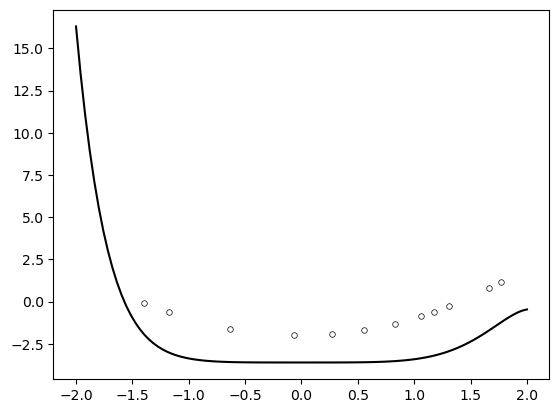

In [19]:
plt.scatter(X0, polynomial(params, X0), c='w', edgecolors='k', s=16, linewidth=0.5)
plt.plot(XR, lasso.predict(eval_u(XR, 10)), color='k')
plt.show()